In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

from sklearn.tree import DecisionTreeClassifier

In [3]:
sns.set_style("darkgrid")

In [4]:
warnings.filterwarnings('ignore')

In [6]:
dataset= pd.read_csv('/content/drive/MyDrive/PRML_files/titanic.csv')

In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
print(round(dataset.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [10]:
# fills missing values in the "Age" column of your dataset with the value -1.
dataset["Age"]=dataset["Age"].fillna(-1)
# now replacing with the respective mean
for data_i in range(dataset.shape[0]):
  if(dataset["Age"][data_i]==-1):
    if(dataset["Sex"][data_i]=="female" and dataset["Pclass"][data_i]==1):
      dataset["Age"][data_i]=35
    elif(dataset["Sex"][data_i]=="female" and dataset["Pclass"][data_i]==2):
      dataset["Age"][data_i]=29
    elif(dataset["Sex"][data_i]=="female" and dataset["Pclass"][data_i]==3):
      dataset["Age"][data_i]=22
    elif(dataset["Sex"][data_i]=="male" and dataset["Pclass"][data_i]==1):
      dataset["Age"][data_i]=41
    elif(dataset["Sex"][data_i]=="male" and dataset["Pclass"][data_i]==2):
      dataset["Age"][data_i]=31
    elif(dataset["Sex"][data_i]=="male" and dataset["Pclass"][data_i]==3):
      dataset["Age"][data_i]=27

In [11]:
print("Percentage of missing values in feature 'Age': ", str((dataset["Age"].isna().sum())/dataset.shape[0])+"%")

Percentage of missing values in feature 'Age':  0.0%


In [12]:
dataset = dataset.drop(columns = ["Cabin"])


In [13]:
print(dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [14]:
dataset.dropna(inplace = True)

In [15]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
dataset.drop(columns=["Name","PassengerId","Ticket"],inplace=True)

In [18]:

print(dataset.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [19]:
print(dataset.info)

<bound method DataFrame.info of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  22.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[889 rows x 8 columns]>


<Axes: xlabel='Survived', ylabel='Fare'>

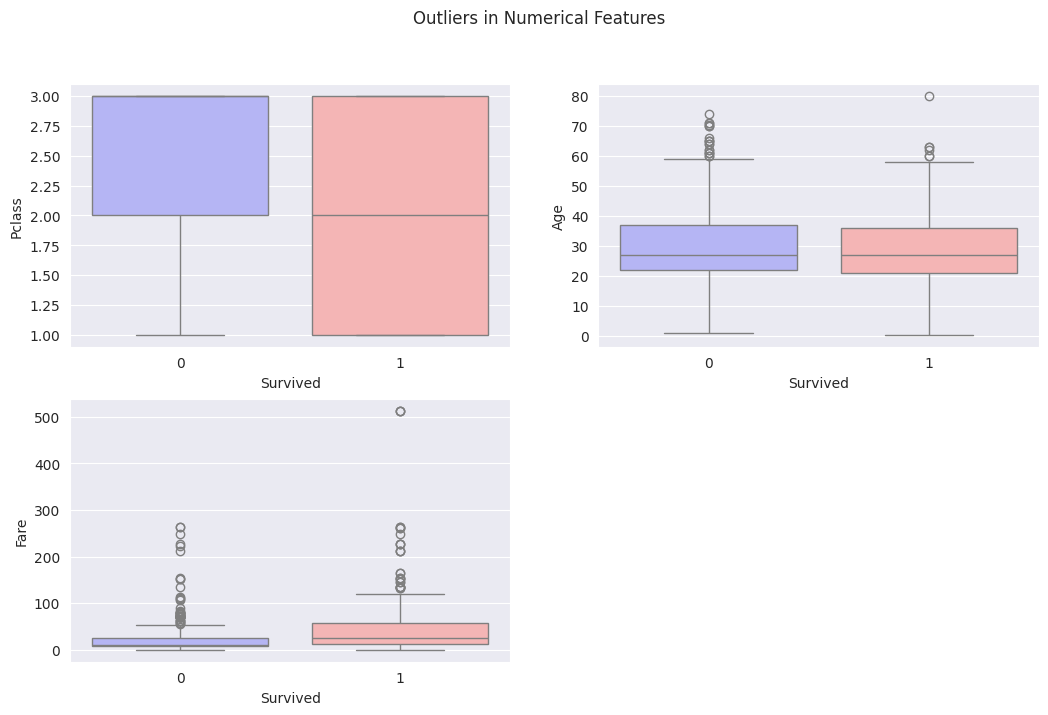

In [20]:
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [22]:
print("descrete Pclass:",dataset["Pclass"].unique())

descrete Pclass: [3 1 2]


In [24]:
dataset["Sex"].replace("female",0,inplace=True)
dataset["Sex"].replace("male",1,inplace=True)
print("after encoding:\n",dataset["Sex"][0:5])

after encoding:
 0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [25]:
print("unique values in embarked:\n",dataset["Embarked"].unique())

unique values in embarked:
 ['S' 'C' 'Q']


In [26]:
def encode_embark(column):
  for d in column:
    if d=='S':
      column[column.index(d)]=0
    elif d=='C':
      column[column.index(d)]=1
    elif d=='Q':
      column[column.index(d)]=2
  return column

In [27]:
dataset["Embarked"]=encode_embark(list(dataset["Embarked"]))
print("new embarked:\n",dataset["Embarked"][0:5])

new embarked:
 0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


<Axes: xlabel='Survived', ylabel='Embarked'>

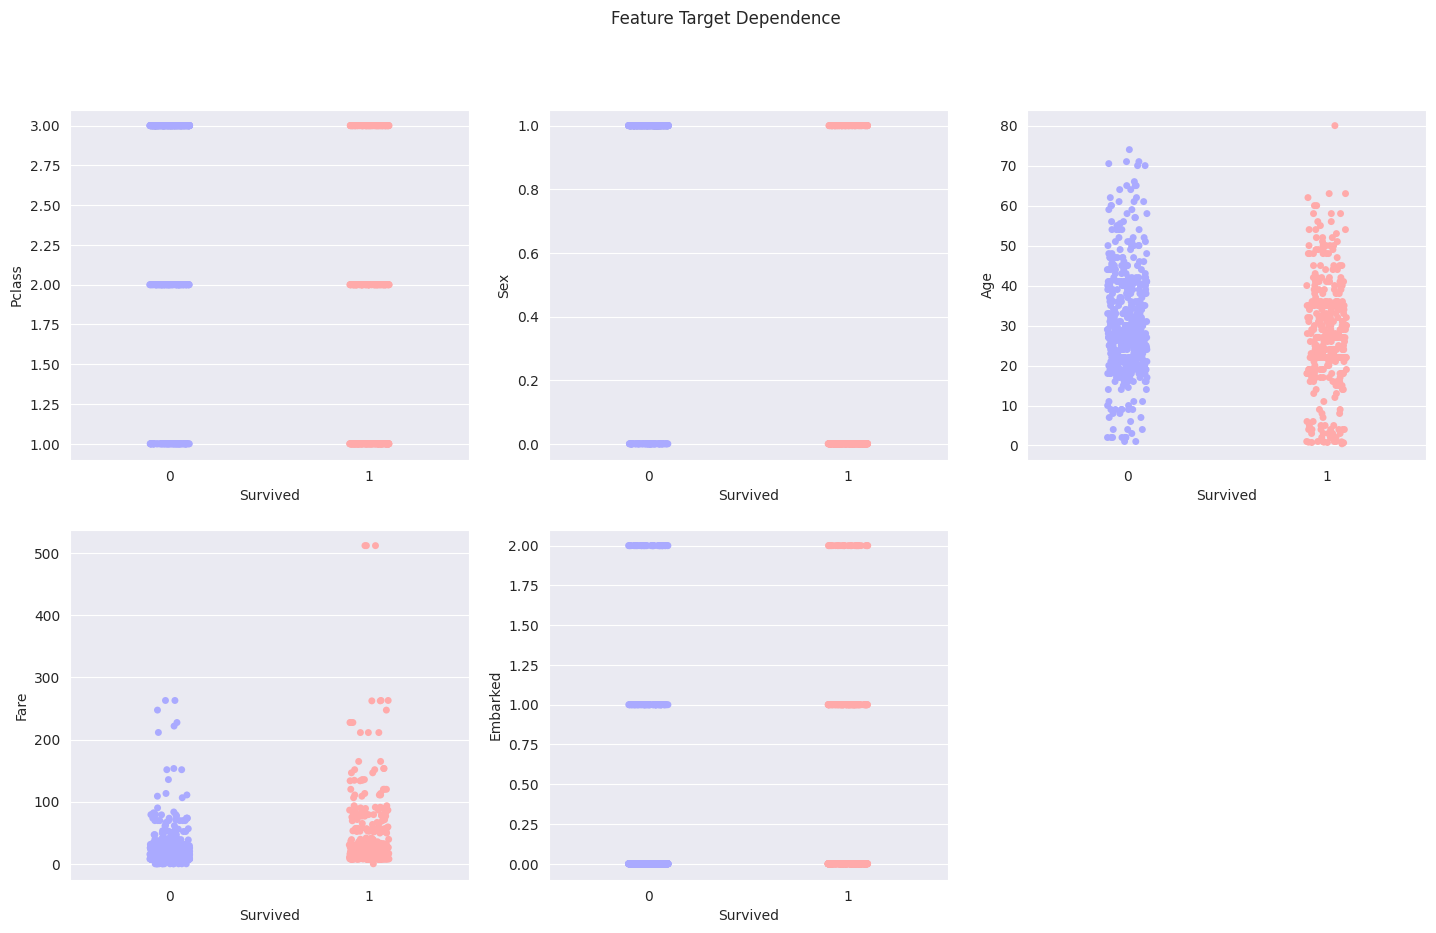

In [28]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = dataset, x = "Survived", y = "Embarked", palette = "bwr")

In [29]:
# Feature and target split
X = dataset.drop(columns=["Survived"])
y = dataset["Survived"]

# Display the first 5 rows of features and target
print("Features:", "\n", X.head())
print("Target:", "\n", y.head())

Features: 
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         0
3       1    0  35.0      1      0  53.1000         0
4       3    1  35.0      0      0   8.0500         0
Target: 
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [30]:

# Set the seed for reproducibility
import random
random.seed(13)

# Determine the sizes of the training, validation, and test sets
train_size = 0.7
val_size = 0.2
test_size = 0.1

# Determine the number of rows for each set
num_rows = len(X)
num_train = int(train_size * num_rows)
num_val = int(val_size * num_rows)

# Create a list of indices and shuffle it
indices = list(range(num_rows))
random.shuffle(indices)

# Split the indices into training, validation, and test sets
train_indices = indices[:num_train]
val_indices = indices[num_train:(num_train + num_val)]
test_indices = indices[(num_train + num_val):]

# Create the training, validation, and test sets
X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]

# Check the shape of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (622, 7)
Shape of y_train: (622,)
Shape of X_val: (177, 7)
Shape of y_val: (177,)
Shape of X_test: (90, 7)
Shape of y_test: (90,)


In [31]:
def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small value to avoid log(0)
    return entropy
def calculate_information_gain_at_split(parent_labels, split_data, split_point):
    weighted_child_entropy = 0.0

    for child_labels in split_data:
        child_entropy = calculate_entropy(child_labels)
        child_weight = len(child_labels) / len(parent_labels)
        weighted_child_entropy += child_weight * child_entropy

    information_gain = calculate_entropy(parent_labels) - weighted_child_entropy
    return information_gain

In [32]:
def find_best_split_for_column(features, target, column):
    unique_values = np.unique(features[column])
    best_information_gain = -1
    best_split_point = None

    if features[column].dtype in [np.float64, np.int64]:
        unique_values = np.sort(unique_values)
        split_points = (unique_values[1:] + unique_values[:-1]) / 2.0
    else:
        split_points = unique_values

    for split_point in split_points:
        split_data = [target[features[column] <= split_point], target[features[column] > split_point]]
        information_gain = calculate_information_gain_at_split(target, split_data, split_point)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_point = split_point

    return best_information_gain, best_split_point
def find_best_split(features, target, columns):
  best_splits = {}

  for column in columns:
      information_gain, split_point = find_best_split_for_column(features, target, column)

      best_splits[information_gain] = {'column': column, 'split_point': split_point}

  return best_splits

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
selected_columns = ['Pclass', 'Embarked', 'Sex']

# Split the dataset based on the specified columns
best_splits = find_best_split(dataset, dataset['Survived'], selected_columns)

print("Best Splits")
for gain, details in best_splits.items():
    print(f"{details['column']}, Information Gain: {gain}, Split Point: {details['split_point']}")


Best Splits
Pclass, Information Gain: 0.07475333655808336, Split Point: 2.5
Embarked, Information Gain: 0.016352257508829737, Split Point: 0.5
Sex, Information Gain: 0.21600805853994387, Split Point: 0.5


In [34]:
def find_best_split_uv(features, target, column, unique_values):
    best_information_gain = -1
    best_split_point = None

    for value in unique_values:
        split_data = [target[features[column] == value], target[features[column] != value]]
        information_gain = calculate_information_gain_at_split(target, split_data, value)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_split_point = value

    return best_information_gain, best_split_point
def conTocat(features, target, column):
    unique_values = np.unique(features[column])

    # For continuous variables, convert to categorical and find best split point
    if features[column].dtype in [np.float64, np.int64]:
        unique_values = np.sort(unique_values)
        split_points = (unique_values[1:] + unique_values[:-1]) / 2.0
        best_information_gain = -1
        best_split_point = None

        for split_point in split_points:
            split_data = [target[features[column] <= split_point],
                          target[features[column] > split_point]]
            information_gain = calculate_information_gain_at_split(target, split_data, split_point)

            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_split_point = split_point

    # For categorical variables, use the original unique values
    else:
        best_information_gain, best_split_point = find_best_split_uv(features, target, column, unique_values)

    return best_information_gain, best_split_point

In [35]:
selected_continuous_columns = ['Fare', 'Age', 'SibSp', 'Parch']
for column in selected_continuous_columns:
    information_gain, split_point = conTocat(dataset, dataset['Survived'], column)

    # Store the information gain, column name, and split point in the dictionary
    best_splits[information_gain] = {'column': column, 'split_point': split_point}

# Print the updated Best Splits dictionary
print("Updated Best Splits:")
for gain, details in best_splits.items():
    print(f"{details['column']}, Info Gain(IG): {gain}, Split Point: {details['split_point']}")

Updated Best Splits:
Pclass, Info Gain(IG): 0.07475333655808336, Split Point: 2.5
Embarked, Info Gain(IG): 0.016352257508829737, Split Point: 0.5
Sex, Info Gain(IG): 0.21600805853994387, Split Point: 0.5
Fare, Info Gain(IG): 0.06762493505811928, Split Point: 10.48125
Age, Info Gain(IG): 0.01689640772088996, Split Point: 6.5
SibSp, Info Gain(IG): 0.01025842705415081, Split Point: 3.5
Parch, Info Gain(IG): 0.015777560712624927, Split Point: 0.5


In [36]:
def train_decision_tree(features, target, max_depth=None, current_depth=0):
    if max_depth is not None and current_depth >= max_depth:
        # If reached max depth, return the majority class as the leaf value
        return {'class': target.mode().iloc[0]} if not target.empty else {'class': None}

    best_splits = find_best_split(features, target, features.columns)

    if not best_splits or target.empty:
        # If no splits are possible or target is empty, return the majority class as the leaf value
        return {'class': target.mode().iloc[0]} if not target.empty else {'class': None}

    # Call conTocat to add values to best_splits
    for information_gain, details in best_splits.items():
        column = details['column']
        values = conTocat(features, target, column)
        details['values'] = values

    # Get the best split based on information gain
    best_split_gain = max(best_splits.keys())
    best_split_info = best_splits[best_split_gain]

    # Apply the split to the dataset
    split_column = best_split_info['column']
    split_point = best_split_info['split_point']

    if features[split_column].dtype in [np.float64, np.int64]:
        left_condition = features[split_column] <= split_point
        right_condition = features[split_column] > split_point
    else:
        left_condition = features[split_column] <= split_point
        right_condition = features[split_column] > split_point

    # Filter the dataset based on the split condition
    left_features = features.loc[left_condition]
    left_target = target.loc[left_condition]

    right_features = features.loc[right_condition]
    right_target = target.loc[right_condition]

    # Recursively build the decision tree for each branch
    left_branch = train_decision_tree(left_features, left_target, max_depth, current_depth + 1)

    right_branch = train_decision_tree(right_features, right_target, max_depth, current_depth + 1)

    return {'column': split_column, 'split_point': split_point,
            'left_branch': left_branch, 'right_branch': right_branch}

In [38]:

tree = train_decision_tree(X, y, max_depth=3)
print(tree)

{'column': 'Sex', 'split_point': 0.5, 'left_branch': {'column': 'Pclass', 'split_point': 2.5, 'left_branch': {'column': 'Fare', 'split_point': 28.85625, 'left_branch': {'class': 1}, 'right_branch': {'class': 1}}, 'right_branch': {'column': 'Fare', 'split_point': 23.35, 'left_branch': {'class': 1}, 'right_branch': {'class': 0}}}, 'right_branch': {'column': 'Fare', 'split_point': 26.26875, 'left_branch': {'column': 'Age', 'split_point': 13.5, 'left_branch': {'class': 1}, 'right_branch': {'class': 0}}, 'right_branch': {'column': 'SibSp', 'split_point': 2.5, 'left_branch': {'class': 0}, 'right_branch': {'class': 0}}}}


In [39]:
def infer(sample_df, decision_tree):
    if 'left_branch' not in decision_tree or 'right_branch' not in decision_tree:
        # If it's a leaf node, return the predicted class if available
        return decision_tree.get('class', None)

    split_column = decision_tree['column']
    split_point = decision_tree['split_point']


    if split_column in decision_tree.get('values', {}):
        sample_value = sample_df[split_column].iloc[0]
        return infer(sample_df, decision_tree['left_branch']) if sample_value <= split_point else infer(sample_df, decision_tree['right_branch'])
    else:
        sample_value = sample_df[split_column].iloc[0]
        return infer(sample_df, decision_tree['left_branch']) if sample_value <= split_point else infer(sample_df, decision_tree['right_branch'])

TESTING

In [40]:
sample_df = pd.DataFrame({'Pclass': [1], 'Sex': [0], 'Age': [18.0], 'SibSp': [1], 'Parch': [0], 'Fare': [20.00], 'Embarked': [1]})

prediction = infer(sample_df, tree)

if prediction is not None:
    if prediction == 0:
        print("Not Survived")
    elif prediction == 1:
        print("Survived")
    else:
        print("Invalid prediction value")
else:
    print("Unable to make a prediction")



Survived


In [41]:
def predict(tree, features):
    if 'class' in tree:
        return tree['class']

    column = tree['column']
    split_point = tree['split_point']

    if features[column].dtype in [np.float64, np.int64]:
        condition = features[column] <= split_point
    else:
        condition = features[column] == split_point

    if condition:
        return predict(tree['left_branch'], features)
    else:
        return predict(tree['right_branch'], features)



In [43]:
def compute_metrics(tree, features, target):
    predictions = features.apply(lambda x: predict(tree, x), axis=1)
    accuracy = accuracy_score(target, predictions)
    confusion_mat = confusion_matrix(target, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(target, predictions, average='binary')

    return accuracy, confusion_mat, precision, recall, f1



In [44]:
train_accuracy, train_confusion, train_precision, train_recall, train_f1 = compute_metrics(tree, X_train, y_train)
test_accuracy, test_confusion, test_precision, test_recall, test_f1 = compute_metrics(tree, X_test, y_test)



In [45]:
# Task-7: Show Confusion Matrix
print("\nConfusion Matrix (Test Data):")
print(test_confusion)
# Task-6: Compute Accuracy
print("Train Accuracy:", train_accuracy*100,"%")
print("Test Accuracy:", test_accuracy*100,"%")



Confusion Matrix (Test Data):
[[50  9]
 [ 9 22]]
Train Accuracy: 81.51125401929261 %
Test Accuracy: 80.0 %


In [46]:
# Task-8: Compute Precision, Recall, F1-score
print("\nPrecision, Recall, F1-score (Test Data):")
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)


Precision, Recall, F1-score (Test Data):
Precision: 0.7096774193548387
Recall: 0.7096774193548387
F1-score: 0.7096774193548389


IMPLEMENTING DECISION TREE USING SKLEARN LIBRARY

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the Decision Tree classifier
# You can adjust max_depth as needed to improve your model's performance
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=13)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = decision_tree_model.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

# Optionally, you can also evaluate the model on the training set to check for overfitting
y_train_pred = decision_tree_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print out the accuracy
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Note: To get a better estimate of the model's performance, consider using cross-validation.


Training Accuracy: 0.8681672025723473
Validation Accuracy: 0.8022598870056498
